# PPI prediction for SP network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
from scipy.stats import ttest_ind
import scipy.stats  as stats
import networkx as nx
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import xgboost as xgb
#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *
network_name='SP'


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from PPI_functions.ipynb
1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## source of data
## https://github.com/mlbioinfolab/ppi-metago/blob/master/protein_pair/EC2/EC2_pair.txt

## publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2907-1

In [2]:
#path_h="/Users/temih/Dropbox/PPI_similarity_new/data/"   # windows
path_h="/Users/hamidteimouri/Dropbox/PPI_similarity_new/data/" # mac


# Step0: Visualization of the network

In [3]:
#G4=network_vis('EC2',path_h)
#!pip install xgboost scikit-learn


# Step 1: Feature extraction using propy


#Descriptors_complete('EC2_sequence_fasta.txt','EC2_descriptors.csv')

# Step 2: Calculate PP distance

In [4]:
# distance_PP('EC2')

# Step 3: Upload data and train/test spilit

In [5]:
X,y,klist,df3=load_network_data(network_name, path_h)



In [6]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

# Step 4: Train logistic and SVM models using all features

In [7]:
all_features_traning_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
all_features_traning_results

{'average logistic regression accuracy:': 0.9408873911822523,
 'average SVM accuracy:': 0.9367218945988954,
 'average logistic regression recall:': 0.9408869943580456,
 'average SVM recall:': 0.9367227960070381,
 'average logistic regression matthews_corrcoef:': 0.8818050067359512,
 'average SVM matthews_corrcoef:': 0.8736299530721161,
 'average logistic regression f1 score:': 0.8818050067359512,
 'average SVM f1 score:': 0.8736299530721161}

In [9]:

## Save dat into pickle file
data_save = {}
data_save['all_features_traning_results']=all_features_traning_results

## now we check if model overfits

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
Y = y
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    results = models_overfitting(X_train, Y_train, X_test, Y_test)


Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.9385
Logistic Regression test_accuracy: 0.6465
Logistic Regression train_recall: 0.9385
Logistic Regression test_recall: 0.6465
Logistic Regression train_mcc: 0.8770
Logistic Regression test_mcc: 0.2934
Logistic Regression train_f1: 0.9385
Logistic Regression test_f1: 0.6535


SVC train_accuracy: 0.9436
SVC test_accuracy: 0.6566
SVC train_recall: 0.9435
SVC test_recall: 0.6566
SVC train_mcc: 0.8874
SVC test_mcc: 0.3135
SVC train_f1: 0.9443
SVC test_f1: 0.6623


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.9461
Logistic Regression test_accuracy: 0.6498
Logistic Regression train_recall: 0.9461
Logistic Regression test_recall: 0.6499
Logistic Regression train_mcc: 0.8922
Logistic Regression test_mcc: 0.2997
Logistic Regression train_f1: 0.9461
Logistic Regression test_f1: 0.6486


SVC train_accuracy: 0.9436
SVC test_accuracy: 0.6835
SVC train_recall: 0.9436
SVC test_recall: 0.683

/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9292
Logistic Regression test_accuracy: 0.6936
Logistic Regression train_recall: 0.9292
Logistic Regression test_recall: 0.6936
Logistic Regression train_mcc: 0.8585
Logistic Regression test_mcc: 0.3872
Logistic Regression train_f1: 0.9292
Logistic Regression test_f1: 0.6977


SVC train_accuracy: 0.9326
SVC test_accuracy: 0.6734
SVC train_recall: 0.9326
SVC test_recall: 0.6734
SVC train_mcc: 0.8659
SVC test_mcc: 0.3469
SVC train_f1: 0.9339
SVC test_f1: 0.6712




# Step 5: Feature Selection Using Lasso Regression

In [11]:
AA=0.004
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

net_charge -0.3096084715769994
AR 0.11142799385615167
NI -0.059447403479091325
ED 0.18104386293533953
IH -0.14916047484470193
MM 0.19983983602109376
PG -0.14010872547902087
VK -0.18979531489833068
_SolventAccessibilityC1 -0.45299589714100197
_ChargeC1 -0.17665213710791294
APAAC16 -0.22413432720335882


{'net_charge': -0.3096084715769994,
 'AR': 0.11142799385615167,
 'NI': -0.059447403479091325,
 'ED': 0.18104386293533953,
 'IH': -0.14916047484470193,
 'MM': 0.19983983602109376,
 'PG': -0.14010872547902087,
 'VK': -0.18979531489833068,
 '_SolventAccessibilityC1': -0.45299589714100197,
 '_ChargeC1': -0.17665213710791294,
 'APAAC16': -0.22413432720335882}

In [12]:
data_save['selected_features_lasso']=featuredict_lasso

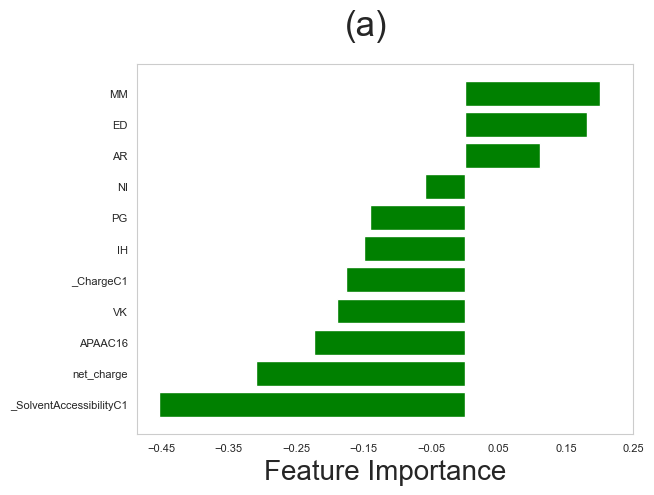

In [13]:

sorted_dict = sorted(featuredict_lasso.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'lasso',20,dr)


## Now we train model using features selection from LASSO mothod

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.6782
Logistic Regression test_accuracy: 0.6128
Logistic Regression train_recall: 0.6782
Logistic Regression test_recall: 0.6130
Logistic Regression train_mcc: 0.3569
Logistic Regression test_mcc: 0.2278
Logistic Regression train_f1: 0.6869
Logistic Regression test_f1: 0.6349


SVC train_accuracy: 0.7464
SVC test_accuracy: 0.6162
SVC train_recall: 0.7464
SVC test_recall: 0.6164
SVC train_mcc: 0.4940
SVC test_mcc: 0.2344
SVC train_f1: 0.7551
SVC test_f1: 0.6369


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.6782
Logistic Regression test_accuracy: 0.6027
Logistic Regression train_recall: 0.6782
Logistic Regression test_recall: 0.6027
Logistic Regression train_mcc: 0.3575
Logistic Regression test_mcc: 0.2054
Logistic Regression train_f1: 0.6899
Logistic Regression test_f1: 0.6014


SVC train_accuracy: 0.7532
SVC test_accuracy: 0.6431
SVC train_recall: 0.7532
SVC test_recall: 0.643

In [15]:
scaled_features_df=df3
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    
    i+=1
    #print(i)
    

In [16]:
# traning metrics
lasso_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)
lasso_results

{'average logistic regression accuracy:': 0.6667228306655434,
 'average SVM accuracy:': 0.7428812131423758,
 'average logistic regression recall:': 0.6667228780213603,
 'average SVM recall:': 0.7428823081858494,
 'average logistic regression matthews_corrcoef:': 0.3342308008137766,
 'average SVM matthews_corrcoef:': 0.4865487315421161,
 'average logistic regression f1 score:': 0.3342308008137766,
 'average SVM f1 score:': 0.4865487315421161}

In [17]:
data_save['lasso_results']=lasso_results

# Step 7: Feature Selection Using Support Vector Machine

In [18]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [19]:

CC = linear_SVM_grid_search(X,y,ns)
#CC=0.2
CC

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/sit

0.1

In [20]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

net_charge -0.8525607448248131
AR 0.35177837564948183
AD 0.1735656531732492
AQ 0.23604533105007305
RA 0.11692483379372201
NI -0.33148633590414206
ED 0.38769429096809555
HS -0.14848885835499834
IE -0.17153139188866878
IH -0.3774437322512608
MM 0.4691978832097824
FI 0.15784760129916794
PG -0.4119904236329627
TQ 0.14815177681424227
TV -0.34347771710097535
WS 0.22406299826492967
YF -0.15837725103025418
VK -0.46109475427996865
MoranAuto_FreeEnergy28 0.18610204334330221
GearyAuto_Polarizability13 0.2820216528681715
_SolventAccessibilityC1 -0.9705883309076739
PAAC3 -0.2551966333507162
PAAC7 -0.43511467543018756
APAAC16 -0.49195242651048604
QSOSW27 0.18276487476880385
QSOgrant27 0.16168175483667152
QSOgrant44 -0.17629912382170476


{'net_charge': -0.8525607448248131,
 'AR': 0.35177837564948183,
 'AD': 0.1735656531732492,
 'AQ': 0.23604533105007305,
 'RA': 0.11692483379372201,
 'NI': -0.33148633590414206,
 'ED': 0.38769429096809555,
 'HS': -0.14848885835499834,
 'IE': -0.17153139188866878,
 'IH': -0.3774437322512608,
 'MM': 0.4691978832097824,
 'FI': 0.15784760129916794,
 'PG': -0.4119904236329627,
 'TQ': 0.14815177681424227,
 'TV': -0.34347771710097535,
 'WS': 0.22406299826492967,
 'YF': -0.15837725103025418,
 'VK': -0.46109475427996865,
 'MoranAuto_FreeEnergy28': 0.18610204334330221,
 'GearyAuto_Polarizability13': 0.2820216528681715,
 '_SolventAccessibilityC1': -0.9705883309076739,
 'PAAC3': -0.2551966333507162,
 'PAAC7': -0.43511467543018756,
 'APAAC16': -0.49195242651048604,
 'QSOSW27': 0.18276487476880385,
 'QSOgrant27': 0.16168175483667152,
 'QSOgrant44': -0.17629912382170476}

In [21]:
data_save['selected_features_svm']=featuredict_svm

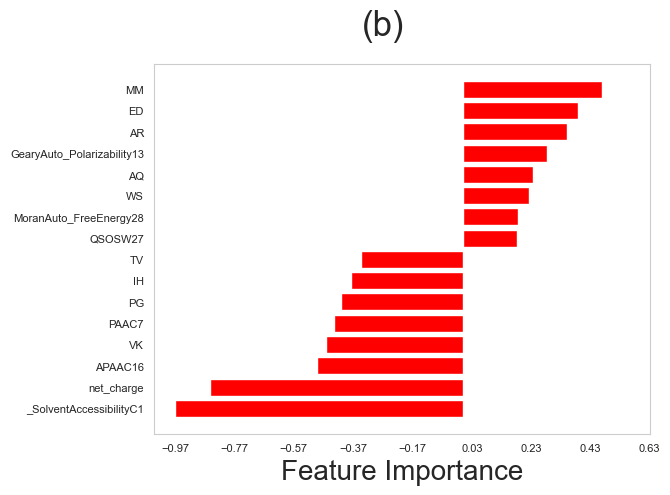

In [22]:

sorted_dict = sorted(featuredict_svm.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.2
selected_features_plotter(featuredict,network_name,'svm',20,dr)


## Training models using selected features from SVM

In [23]:
scaled_features_df=df3

cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    i+=1

In [24]:
results_svm = models_crossval(Xtrain_cv,Ytrain_cv,ns)
results_svm

{'average logistic regression accuracy:': 0.7206964335860714,
 'average SVM accuracy:': 0.8196012356079755,
 'average logistic regression recall:': 0.7206944846630063,
 'average SVM recall:': 0.8196001612527752,
 'average logistic regression matthews_corrcoef:': 0.44165673444650166,
 'average SVM matthews_corrcoef:': 0.6393966960242091,
 'average logistic regression f1 score:': 0.44165673444650166,
 'average SVM f1 score:': 0.6393966960242091}

In [25]:
data_save['results_svm']=results_svm

# check for overfitting

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7380
Logistic Regression test_accuracy: 0.6667
Logistic Regression train_recall: 0.7380
Logistic Regression test_recall: 0.6667
Logistic Regression train_mcc: 0.4763
Logistic Regression test_mcc: 0.3334
Logistic Regression train_f1: 0.7432
Logistic Regression test_f1: 0.6689


SVC train_accuracy: 0.8256
SVC test_accuracy: 0.6431
SVC train_recall: 0.8256
SVC test_recall: 0.6432
SVC train_mcc: 0.6517
SVC test_mcc: 0.2867
SVC train_f1: 0.8291
SVC test_f1: 0.6513


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7313
Logistic Regression test_accuracy: 0.6768
Logistic Regression train_recall: 0.7313
Logistic Regression test_recall: 0.6768
Logistic Regression train_mcc: 0.4627
Logistic Regression test_mcc: 0.3535
Logistic Regression train_f1: 0.7348
Logistic Regression test_f1: 0.6779


SVC train_accuracy: 0.8231
SVC test_accuracy: 0.6768
SVC train_recall: 0.8231
SVC test_recall: 0.676

In [27]:
with open(network_name+'_results.pkl' , 'wb') as file:
    pickle.dump(data_save,file)

In [28]:
with open(network_name+'_results.pkl' , 'rb') as file:
    load_data=pickle.load(file)
    